In [1]:
# Import libraries

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
# load data

df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Drop nulls and remove rows with loacation outside of Washington state, reset index

df = df.dropna()

df = df[(df.lat > 45) &
        (df.lat < 50) &
        (df.long > -124) &
        (df.long < -116)]

df.reset_index(drop=True, inplace=True)

In [4]:
# df.head()
# df.tail()
# df.info()
# df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [10]:
# Encode ordinals

ordinal_data = data_categorical[['view', 'condition', 'grade']]

# Ordinal encode 'view' and create df for concat

view_ord_cats = [['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']]

view_ords = OrdinalEncoder(categories=view_ord_cats)
view_ords.fit(pd.DataFrame(ordinal_data['view']))
view_encoded = view_ords.transform(pd.DataFrame(ordinal_data['view']))
view_encoded

view_enc = pd.DataFrame(view_encoded, columns=['view_enc'])

# Ordinal encode 'condition' and create df for concat

condition_ord_cats = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]

cond_ords = OrdinalEncoder(categories=condition_ord_cats)
cond_ords.fit(pd.DataFrame(ordinal_data['condition']))
cond_encoded = cond_ords.transform(pd.DataFrame(ordinal_data['condition']))
cond_encoded

cond_enc = pd.DataFrame(cond_encoded, columns=['cond_enc'])
cond_enc

# Ordinal encode 'grade' and create df for concat

grade_ord_cats = [['1', '2 Substandard','3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']]

grade_ords = OrdinalEncoder(categories=grade_ord_cats)
grade_ords.fit(pd.DataFrame(ordinal_data['grade']))
grade_encoded = grade_ords.transform(pd.DataFrame(ordinal_data['grade']))
grade_encoded

grade_enc = pd.DataFrame(grade_encoded, columns=['grade_enc'])

In [11]:
# Create dummy columns of non-ordinal category data

cat_data = pd.DataFrame(df.select_dtypes("object")).drop(['date','address'], axis=1)

cat_dums = pd.get_dummies(cat_data)
cat_dums = cat_dums.add_suffix('_dum')

In [12]:
# Concatonate numerical and encoded features

# Concat ordinal dfs
ords_conc = pd.concat([view_enc, cond_enc, grade_enc], axis=1)

# Get numerical data
data_numerical = df._get_numeric_data()
data_numerical

#Concatonate all
concat_all = pd.concat([data_numerical, ords_conc, cat_dums], axis=1)

# Set df to new df (concat_all)
df = concat_all
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Electricity/Solar_dum,heat_source_Gas_dum,heat_source_Gas/Solar_dum,heat_source_Oil_dum,heat_source_Oil/Solar_dum,heat_source_Other_dum,sewer_system_PRIVATE_dum,sewer_system_PRIVATE RESTRICTED_dum,sewer_system_PUBLIC_dum,sewer_system_PUBLIC RESTRICTED_dum
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,...,0,1,0,0,0,0,0,0,1,0
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,1,0,0,0,0,1,0
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,...,0,1,0,0,0,0,0,0,1,0
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,...,0,1,0,0,0,0,0,0,1,0
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,...,0,0,0,1,0,0,0,0,1,0
29226,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,...,0,1,0,0,0,0,0,0,1,0
29227,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,...,0,1,0,0,0,0,0,0,1,0
29228,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,480,...,0,1,0,0,0,0,0,0,1,0


In [13]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29230 entries, 0 to 29229
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   29230 non-null  int64  
 1   price                                29230 non-null  float64
 2   bedrooms                             29230 non-null  int64  
 3   bathrooms                            29230 non-null  float64
 4   sqft_living                          29230 non-null  int64  
 5   sqft_lot                             29230 non-null  int64  
 6   floors                               29230 non-null  float64
 7   sqft_above                           29230 non-null  int64  
 8   sqft_basement                        29230 non-null  int64  
 9   sqft_garage                          29230 non-null  int64  
 10  sqft_patio                           29230 non-null  int64  
 11  yr_built                    

In [14]:
# Check correlation to price

df.corr()['price'].map(abs).sort_values(ascending=False)

price                                  1.000000
sqft_living                            0.616801
grade_enc                              0.577741
sqft_above                             0.546204
bathrooms                              0.488011
view_enc                               0.321668
grade_11 Excellent_dum                 0.321035
sqft_patio                             0.317374
grade_10 Very Good_dum                 0.302246
view_EXCELLENT_dum                     0.293200
bedrooms                               0.291181
grade_12 Luxury_dum                    0.287537
view_NONE_dum                          0.279564
lat                                    0.277899
sqft_garage                            0.267660
grade_7 Average_dum                    0.262421
sqft_basement                          0.246605
waterfront_NO_dum                      0.239706
waterfront_YES_dum                     0.239706
grade_9 Better_dum                     0.210273
grade_13 Mansion_dum                   0

In [15]:
# Run baseline model

y = df['price']
X = sm.add_constant(df['sqft_living'])

results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.795e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:15:48   Log-Likelihood:            -4.3507e+05
No. Observations:               29230   AIC:                         8.701e+05
Df Residuals:                   29228   BIC:                         8.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.197e+04   9891.249     -9.299      0.000   -1.11e+05   -7.26e+04
sqft_living   565.3330      4.220    133.969      0.000     557.062     573.604
==============================================================================
Omnibus:                    42316.917   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50243924.717
Skew:                           8.240   Prob(JB):                         0.00
Kurtosis:                     205.441   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
nums_n_ords = df.iloc[:, 0:17]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,view_enc,cond_enc
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052,0.0,3.0
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591,2.0,2.0
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520,2.0,2.0
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020,2.0,2.0
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,0,47.664740,-122.32940,0.0,3.0
29226,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011,0,47.565610,-122.38851,1.0,2.0
29227,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,1995,0,47.610395,-122.29585,0.0,2.0
29228,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,2006,0,47.449490,-122.18908,0.0,2.0


<AxesSubplot:>

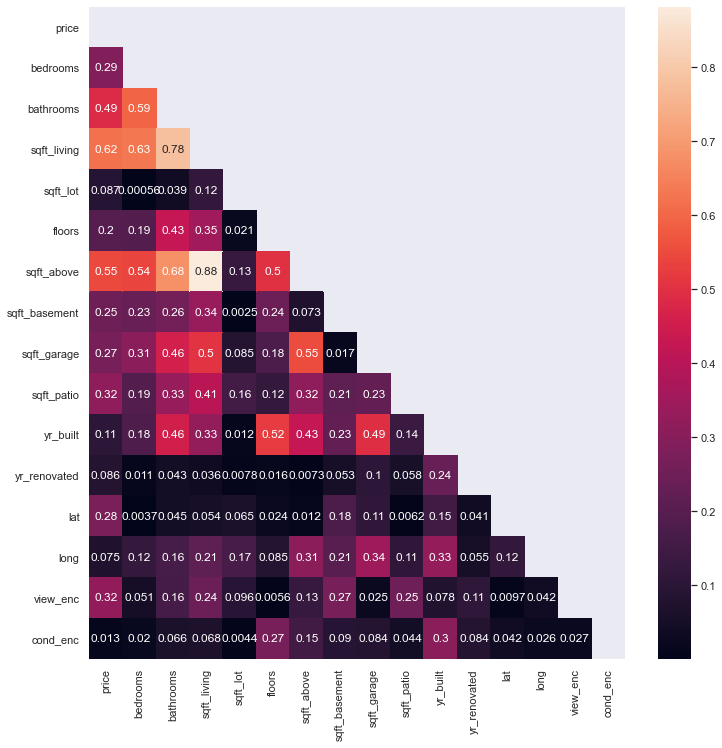

In [18]:
# Create heatmap of correlation of numericals and ordinals

sns.set(rc={'figure.figsize':(12, 12)})

nums_n_ords = df.iloc[:, 0:17]

mask  = np.triu(np.ones_like(nums_n_ords.drop('id', axis=1).corr()))
sns.heatmap(abs(nums_n_ords.drop('id', axis=1).corr()), annot=True, mask=mask)

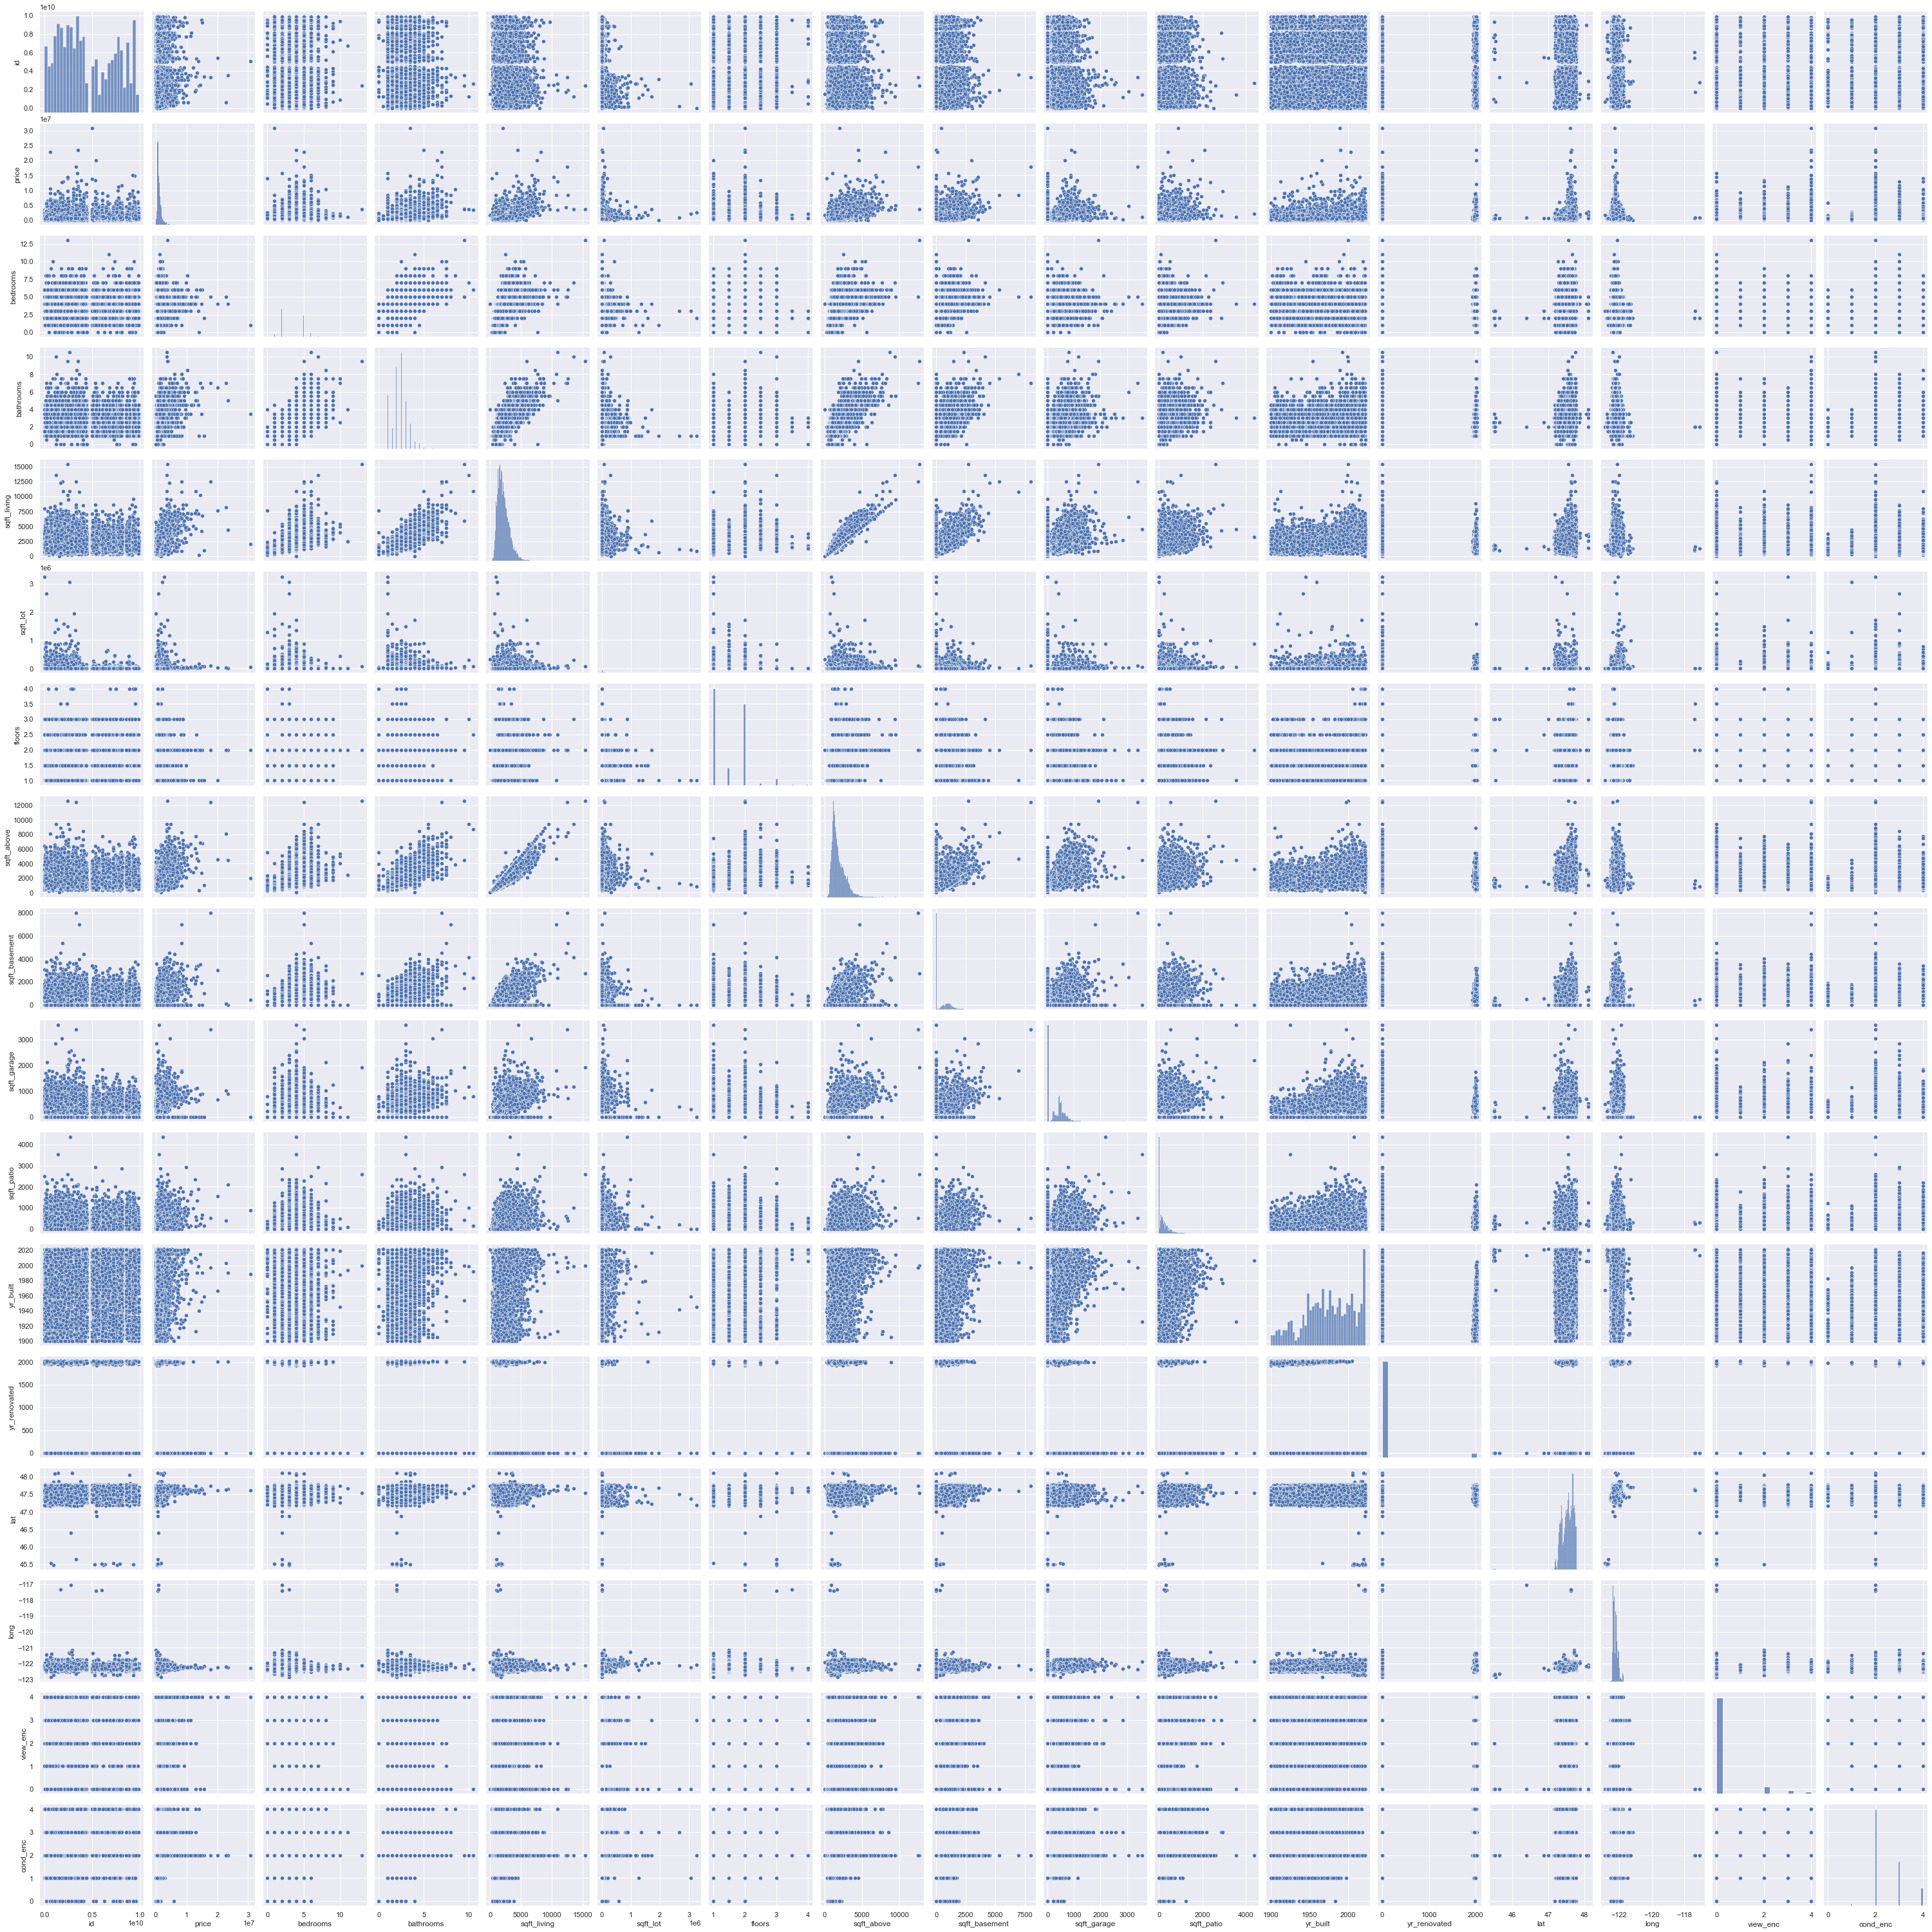

In [19]:
# Run pairplot of nums and ords

sns.pairplot(data=nums_n_ords);

In [20]:
# Run model with sqft_living and grade_enc, the two higest correlations to price at this point

# Get sqaure foot living and grade encoded and concatonate
df_gr_enc = pd.DataFrame(df.grade_enc)
df_sq_ft = pd.DataFrame(df.sqft_living)
X3 = pd.concat([df_sq_ft, df_gr_enc], axis=1)

y = df['price']
X = sm.add_constant(X3)

# Run model
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:19:24   Log-Likelihood:            -4.3427e+05
No. Observations:               29230   AIC:                         8.685e+05
Df Residuals:                   29227   BIC:                         8.686e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.092e+06   2.65e+04    -41.188      0.000   -1.14e+06   -1.04e+06
sqft_living   383.3301      6.089     62.955      0.000     371.395     395.265
grade_enc    2.089e+05   5161.422     40.482      0.000    1.99e+05    2.19e+05
==============================================================================
Omnibus:                    43379.074   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55328925.014
Skew:                           8.657   Prob(JB):                         0.00
Kurtosis:                     215.437   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Everything below here is a mess

In [ ]:
data_categorical = pd.DataFrame(df.select_dtypes("object")).drop(['date','address'], axis=1)
data_categorical.head()

In [ ]:
cat_data = data_categorical[['waterfront', 'greenbelt', 'nuisance', 'heat_source', 'sewer_system']]
ordinal_data = data_categorical[['view', 'condition', 'grade']]

In [ ]:
cat_dums = pd.get_dummies(cat_data)
cat_dums = cat_dums.add_suffix('_dum')
cat_dums

In [ ]:
pd.get_dummies(cat_data, drop_first=True)

In [ ]:
df['grade'].value_counts()

In [ ]:
pd.DataFrame(ordinal_data['grade'])

In [ ]:
cat_wat = pd.DataFrame(cat_data.waterfront)
cat_wat

In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(cat_wat)
wat_encoded = ohe.transform(cat_wat)
wat_encoded = pd.DataFrame(wat_encoded).add_prefix('wat_')
wat_encoded

In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(pd.DataFrame(cat_data['waterfront']))
waterfront_enc = ohe.transform(pd.DataFrame(cat_data['waterfront']))


In [ ]:
waterfront_enc

In [ ]:
pd.DataFrame(waterfront_enc)

In [ ]:
cat_encoded

In [ ]:
pd.DataFrame(cat_encoded)

In [ ]:
y = df['price']
X = sm.add_constant(df['sqft_living'])

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
y = df['price']
X = sm.add_constant(view_encoded)

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
y = df['price']
X = sm.add_constant(grade_encoded)

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
y = df['price']
X = sm.add_constant(cond_encoded)

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
df_gr_enc = pd.DataFrame(df.grade_enc)
df_sq_ft = pd.DataFrame(df.sqft_living)

X3 = pd.concat([df_sq_ft, df_gr_enc], axis=1)

y = df['price']
X = sm.add_constant(X3)

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
y = df['price']
X = sm.add_constant(X3)

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
sns.set(rc={'figure.figsize':(12, 12)})

mask  = np.triu(np.ones_like(concat_all.drop('id', axis=1).corr()))
sns.heatmap(abs(concat_all.drop('id', axis=1).corr()), annot=True, mask=mask)

In [ ]:
df_sq_ftb = pd.DataFrame(df['sqft_basement'])
df_sq_ftb

In [ ]:
X4 = pd.DataFrame(np.hstack([df_sq_ft, df_gr_enc, df_sq_ftb]))

In [ ]:
y = df['price']
X = sm.add_constant(X4)

results = sm.OLS(y,X).fit()
results.summary()